In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# estrutura aresta
class Aresta:
    # inicializa aresta
    def __init__(self, comeca, termina, peso):
        self.comeca = comeca
        self.termina = termina
        self.peso = peso
        
    # cria aresta no sentido contrario com mesmo peso
    def aresta_volta(self):
        return Aresta(self.termina, self.comeca, self.peso)

# estrutura grafo
class Grafo:
    # inicia grafo
    def __init__(self):
        self._adj = {}
        self.V = []
        self.E = []
    
    # adiciona vertice somente se ele não foi adicionado ainda
    def adiciona_vertice(self, vertice):
        if vertice not in self._adj:
            self.V.append(vertice)
            self._adj[vertice] = set()
    
    # adiciona aresta não direcional
    def adiciona_aresta(self, aresta):
        
        # como a função adciona_aresta so adiciona o vertice se ele não foi adicionado
        # anteriormente então podemos chamar a funcao aqui para ter certeza 
        # de que a aresta possui vertices válidos
        self.adiciona_vertice(aresta.comeca)
        self.adiciona_vertice(aresta.termina)
        
        # adiciona aresta nalista de arestas
        if aresta not in self.E:
            self.E.append(aresta)
            self.E.append(aresta.aresta_volta())
        
        # adiciona vertice na lista de adjacencia
        self._adj[aresta.comeca].add(aresta)
        self._adj[aresta.termina].add(aresta.aresta_volta())
    
    # adiciona aresta não direcional
    def adiciona_aresta_direcionada(self, aresta):
        
        # como a função adciona_aresta so adiciona o vertice se ele não foi adicionado
        # anteriormente então podemos chamar a funcao aqui para ter certeza 
        # de que a aresta possui vertices válidos
        self.adiciona_vertice(aresta.comeca)
        self.adiciona_vertice(aresta.termina)
        
        # adiciona aresta nalista de arestas
        if aresta not in self.E:
            self.E.append(aresta)
        
        # adiciona vertice na lista de adjacencia
        self._adj[aresta.comeca].add(aresta)
        
    # função para fazer output do grafo
    def print_grafo(self):
        for i in self._adj:
            print(i,end=': ')
            for v in self._adj[i]:
                print(f'{v.comeca}-{v.peso}-{v.termina}',end='   ')
            print()
            print('-------------------------------------------------------------------------------------------')
    
    # função find
    # função faz 'rastreamento' da raiz
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
    
    # função union
    #função faz a junção de duas arvores
    def union(self, parent, rank, u, v):
        uroot = self.find(parent, u)
        vroot = self.find(parent, v)
        
        if rank[uroot] < rank[vroot]:
            parent[uroot] = vroot
        elif rank[uroot] > rank[vroot]:
            parent[vroot] = uroot
        else:
            parent[vroot] = uroot
            rank[uroot] += 1
    
    # retorna vizinhos de v
    def vizinhos(self, v):
        return iter(self._adj[v])
    
    @property
    def n(self):
        return len(self._adj)
    
    # algoritmo de kruskal nos entrega a árvore geradora mínima
    def Kruskal(self):
        arvore = Grafo()
        resultado = []
        i, e = 0, 0
        aux = sorted(self.E, key=lambda Aresta: Aresta.peso)
        parent = {}
        rank = {}
        
        for node in self.V:
            parent[node] = node
            rank[node] = (0)
            
        while e < len(self.V) - 1:
            u, v, w = aux[i].comeca, aux[i].termina, aux[i].peso
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                resultado.append([u, v, w])
                arvore.adiciona_aresta(Aresta(u,v,w))
                self.union(parent, rank, x, y)      
        return arvore

    
    
    def BFS_caminho(self, x, y):
        G_aux = Grafo()
        G_aux.V = self.V.copy()
        G_menor = Grafo()
        G_menor.V = self.V.copy()
        
        nao_visitado = self.V.copy()
        nao_visitado.remove(x)
        
        queue = []
        queue.append(x)
            
        while(queue):
            u = queue.pop(0)

            for v in list(self.vizinhos(u)):
                if(v.termina in nao_visitado):
                    G_aux.adiciona_aresta_direcionada(Aresta(v.termina,u,v.peso))
                    nao_visitado.remove(v.termina)
                    queue.append(v.termina)
                if(v.termina == y):
                    self.valor_caminho(G_aux, G_menor, x, y, valor=0)
                    G_menor.retira_nos_nao_utilizados()
                    return G_menor
                    
                    
        return G_aux
    
    def valor_caminho(self, G_aux, G_menor, x, y, valor):
        if x != y:
            valor = valor + list(G_aux.vizinhos(y))[0].peso
            G_menor.adiciona_aresta(Aresta(list(G_aux.vizinhos(y))[0].termina,y,list(G_aux.vizinhos(y))[0].peso))
            self.valor_caminho(G_aux, G_menor, x, list(G_aux.vizinhos(y))[0].termina, valor)
        if x == y:
            print(f'A distância é: {valor}')
            print()
            print('Ordem das cidades percorridas:  ', end='')
        print(f'{y}  ', end='')
    
    def retira_nos_nao_utilizados(self):
        for v in self.V:
            if v not in self._adj:
                self.V.remove(v)
                print(v)
        print(self.V)

In [3]:
def plot_grafo(G):
    fig = plt.figure(figsize=(20,15))
    g = nx.Graph()

    for v in G.V:
        g.add_node(v)
    
    color_map = []
    for node in g:
        color_map.append('#F0E68C')

    for u in G._adj:
        lista = list(G._adj[u])
        for v in lista:
            g.add_edge(v.comeca,v.termina,weight=v.peso)

    pos=nx.kamada_kawai_layout(g) 
    nx.draw_networkx(g, pos, node_color=color_map)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)


In [4]:
G = Grafo()

capitais = pd.read_json("teste/estados_brasileiros.json")

for capital in list(capitais[0]):
    G.adiciona_vertice(capital)

In [5]:
distancia = pd.read_json("teste/distancia_estados.json")
for v in distancia:
    if distancia.get(v)[0] != 0:
        G.adiciona_aresta(Aresta(v.split(":")[0], v.split(":")[1], distancia.get(v)[0]))


In [6]:
Arvore = G.Kruskal()

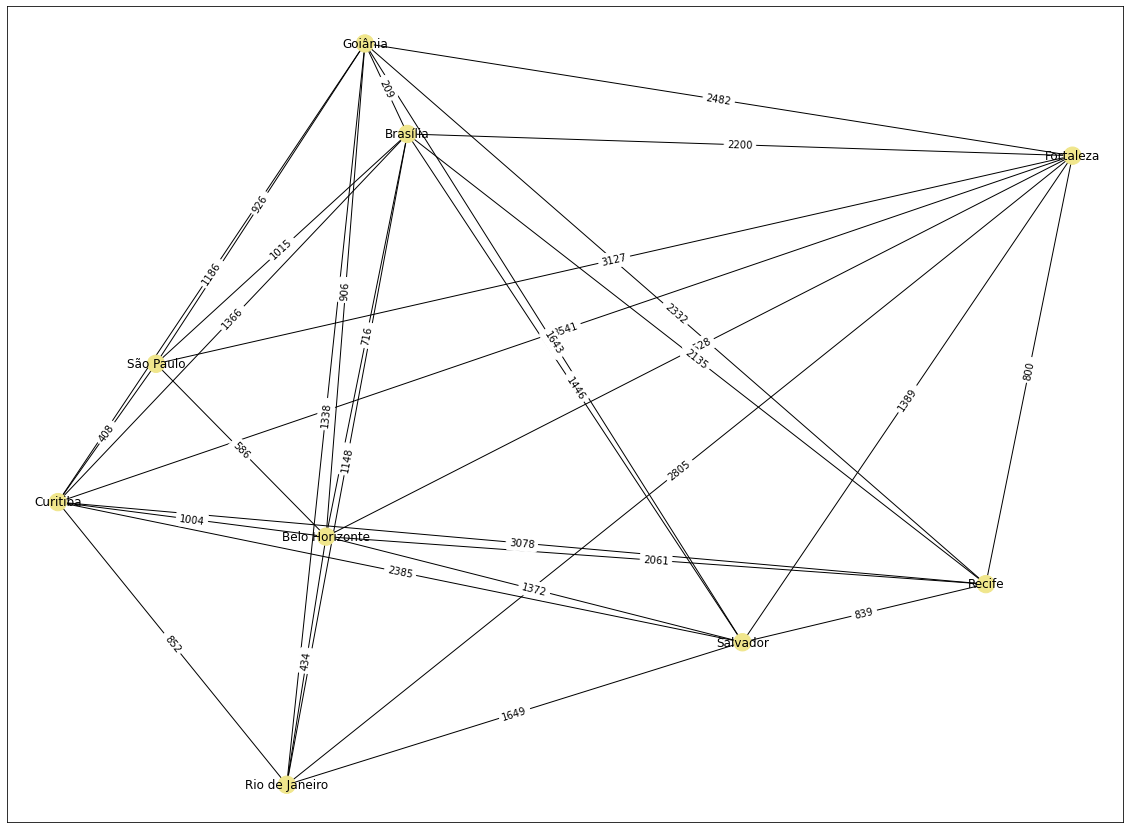

In [7]:
plot_grafo(G)

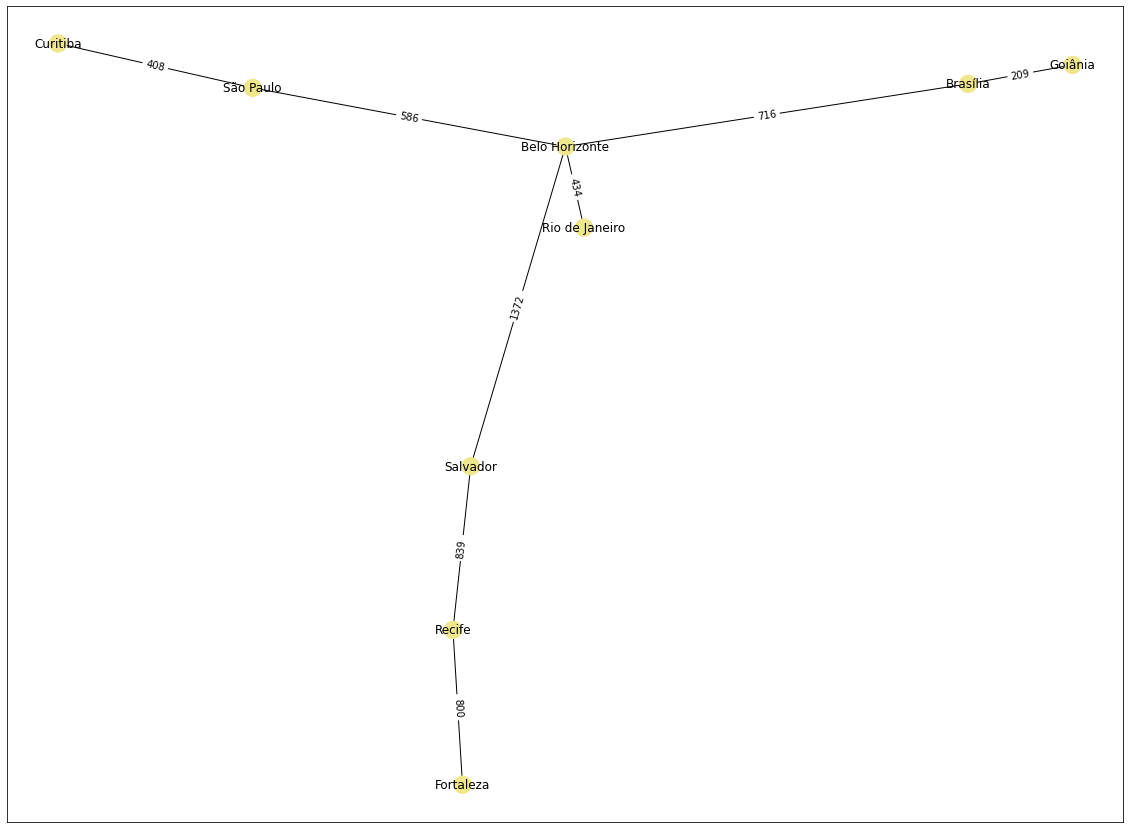

In [8]:
plot_grafo(Arvore)

In [ ]:
print("Digite a cidade de partida: ", end='')
cidade_origem = input()
print("Digite a cidade de destino: ", end='')
cidade_destino = input()

Digite a cidade de partida: 

In [ ]:
plot_grafo(Arvore.BFS_caminho(cidade_origem, cidade_destino))